# Analyzing the sawtooth signal in UDM data

UDM data have a spurious sawtooth signal with a dominant period of about 90 seconds.

In this notebook I attempt to diagnose and remove the effects of this signal for:

* Spectrum calculations for integrated wave properties
* Calculation of mean elevation over longer period of time

In [1]:
from asist.utility import binavg, running_mean, power_spectrum
from datetime import datetime, timedelta
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import detrend
from sustain_drag_2020.udm import read_udm_from_toa5
import warnings
warnings.filterwarnings('ignore')

import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)

## Load UDM data

In [2]:
DATAPATH = '/home/milan/Work/sustain/data/sustain-drag-2020/20191114'
files = glob.glob(DATAPATH + '/TOA5_SUSTAIN_ELEVx6_20Hz*.dat')
start_time = datetime(2019, 11, 14, 19, 0)

In [3]:
# read UDM data from TOA5 files
time, u1, u2, u3, u4, u5, u6 = read_udm_from_toa5(files)

Reading  TOA5_SUSTAIN_ELEVx6_20Hz.ELEV_1109_2019_11_14_1900.dat


## First look at raw data

Text(0, 0.5, 'Distance [m]')

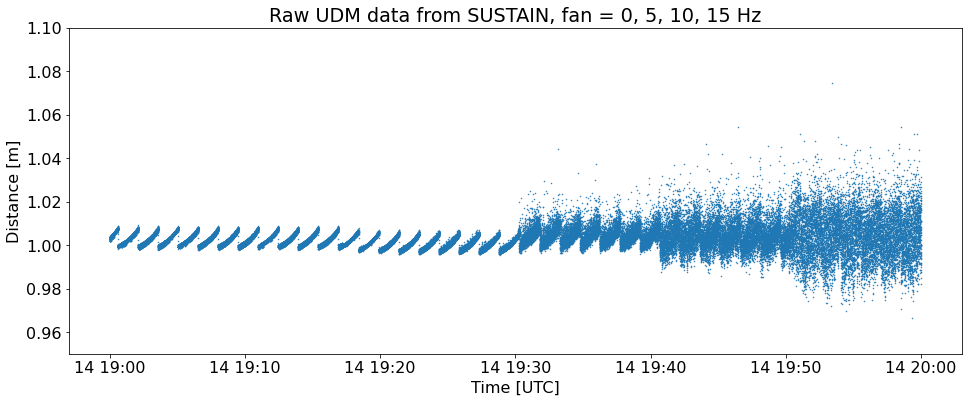

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(time, u3, '.', ms=1)
plt.ylim(0.95, 1.1)
plt.title('Raw UDM data from SUSTAIN, fan = 0, 5, 10, 15 Hz')
plt.xlabel('Time [UTC]')
plt.ylabel('Distance [m]')

## Transform from absolute distance to water elevation

In [5]:
def get_elevation_from_udm(u, mask):
    return np.mean(u[mask]) - u

In [6]:
mask = time <= start_time + timedelta(minutes=20)

e1 = get_elevation_from_udm(u1, mask)
e2 = get_elevation_from_udm(u2, mask)
e3 = get_elevation_from_udm(u3, mask)
e4 = get_elevation_from_udm(u4, mask)
e5 = get_elevation_from_udm(u5, mask)
e6 = get_elevation_from_udm(u6, mask)

Text(0, 0.5, 'Distance [m]')

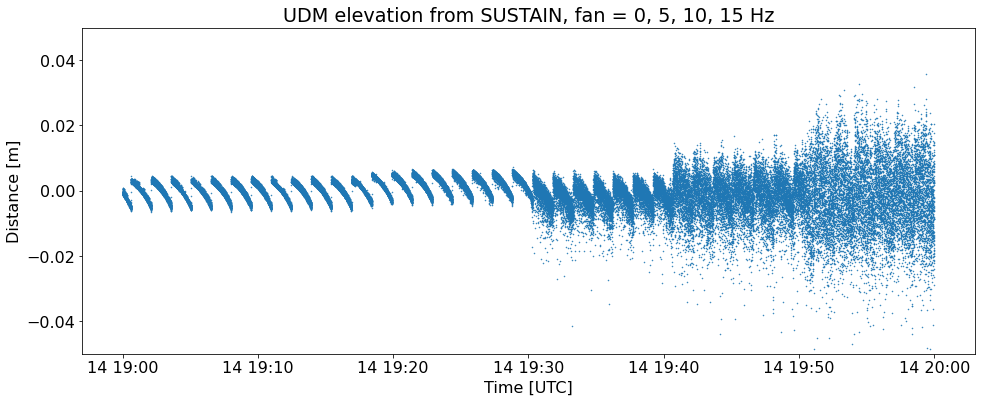

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(time, e3, '.', ms=1)
plt.ylim(-0.05, 0.05)
plt.title('UDM elevation from SUSTAIN, fan = 0, 5, 10, 15 Hz')
plt.xlabel('Time [UTC]')
plt.ylabel('Distance [m]')

## Zoom in on on the sawtooth and plot all 6 instruments

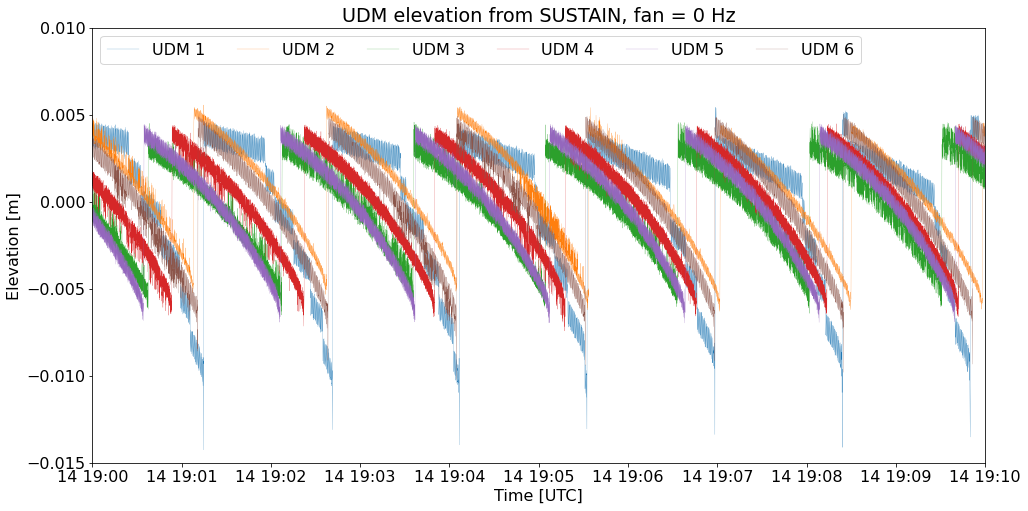

In [8]:
plt.figure(figsize=(16, 8))
plt.plot(time[mask], e1[mask], lw=0.2, label='UDM 1')
plt.plot(time[mask], e2[mask], lw=0.2, label='UDM 2')
plt.plot(time[mask], e3[mask], lw=0.2, label='UDM 3')
plt.plot(time[mask], e4[mask], lw=0.2, label='UDM 4')
plt.plot(time[mask], e5[mask], lw=0.2, label='UDM 5')
plt.plot(time[mask], e6[mask], lw=0.2, label='UDM 6')
plt.xlim(datetime(2019, 11, 14, 19, 0), datetime(2019, 11, 14, 19, 10))
plt.ylim(-0.015, 0.01)
plt.ylabel('Elevation [m]')
plt.xlabel('Time [UTC]')
plt.title('UDM elevation from SUSTAIN, fan = 0 Hz')
plt.legend(loc='upper left', ncol=6)

## Zoom in on the ~90-second scale oscillations

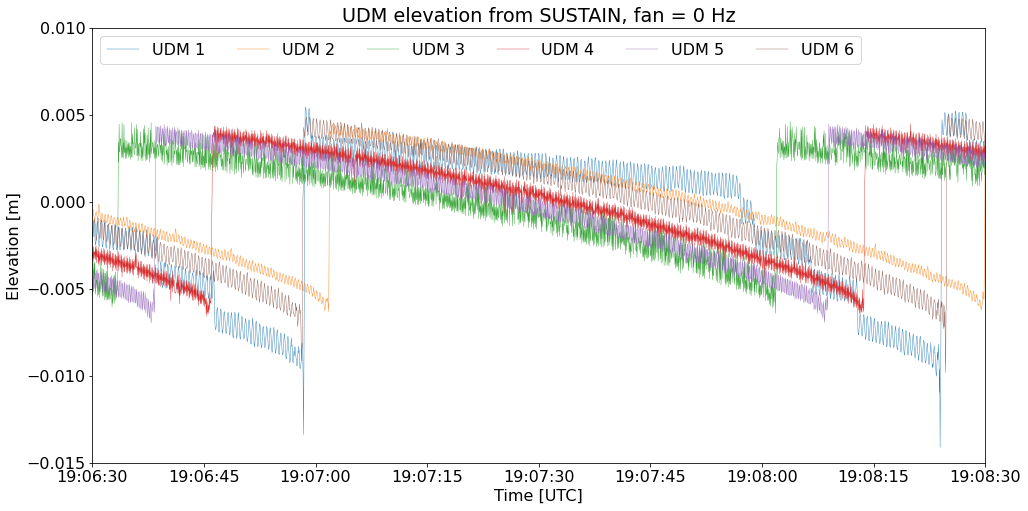

In [9]:
plt.figure(figsize=(16, 8))
plt.plot(time[mask], e1[mask], lw=0.4, label='UDM 1')
plt.plot(time[mask], e2[mask], lw=0.4, label='UDM 2')
plt.plot(time[mask], e3[mask], lw=0.4, label='UDM 3')
plt.plot(time[mask], e4[mask], lw=0.4, label='UDM 4')
plt.plot(time[mask], e5[mask], lw=0.4, label='UDM 5')
plt.plot(time[mask], e6[mask], lw=0.4, label='UDM 6')
plt.xlim(datetime(2019, 11, 14, 19, 6, 30), datetime(2019, 11, 14, 19, 8, 30))
plt.ylim(-0.015, 0.01)
plt.ylabel('Elevation [m]')
plt.xlabel('Time [UTC]')
plt.title('UDM elevation from SUSTAIN, fan = 0 Hz')
plt.legend(loc='upper left', ncol=6)

## Zoom in on the smallest-scale oscillations

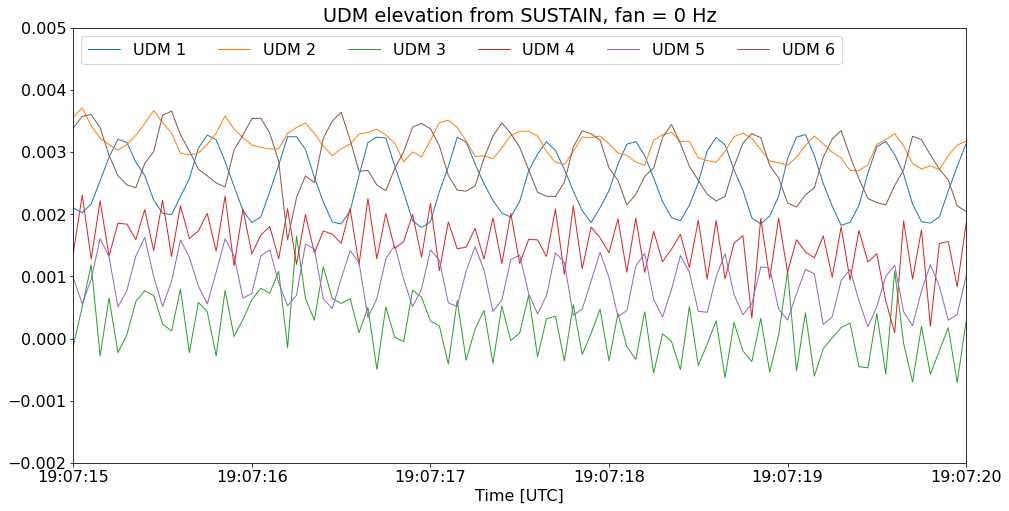

In [10]:
plt.figure(figsize=(16, 8))
plt.plot(time[mask], e1[mask], lw=1, label='UDM 1')
plt.plot(time[mask], e2[mask], lw=1, label='UDM 2')
plt.plot(time[mask], e3[mask], lw=1, label='UDM 3')
plt.plot(time[mask], e4[mask], lw=1, label='UDM 4')
plt.plot(time[mask], e5[mask], lw=1, label='UDM 5')
plt.plot(time[mask], e6[mask], lw=1, label='UDM 6')
plt.xlim(datetime(2019, 11, 14, 19, 7, 15), datetime(2019, 11, 14, 19, 7, 20))
plt.ylim(-0.002, 0.005)
plt.xlabel('Time [UTC]')
plt.title('UDM elevation from SUSTAIN, fan = 0 Hz')
plt.legend(loc='upper left', ncol=6)

## Compute the frequency spectrum

In [11]:
mask = time <= start_time + timedelta(minutes=10)
F1, f, df = power_spectrum(detrend(e1[mask]), 1 / 20, binsize=1)
F2, f, df = power_spectrum(detrend(e2[mask]), 1 / 20, binsize=1)
F3, f, df = power_spectrum(detrend(e3[mask]), 1 / 20, binsize=1)
F4, f, df = power_spectrum(detrend(e4[mask]), 1 / 20, binsize=1)
F5, f, df = power_spectrum(detrend(e5[mask]), 1 / 20, binsize=1)
F6, f, df = power_spectrum(detrend(e6[mask]), 1 / 20, binsize=1)

Text(0.5, 1.0, 'Frequency spectrum of UDM elevation, fan = 0 Hz')

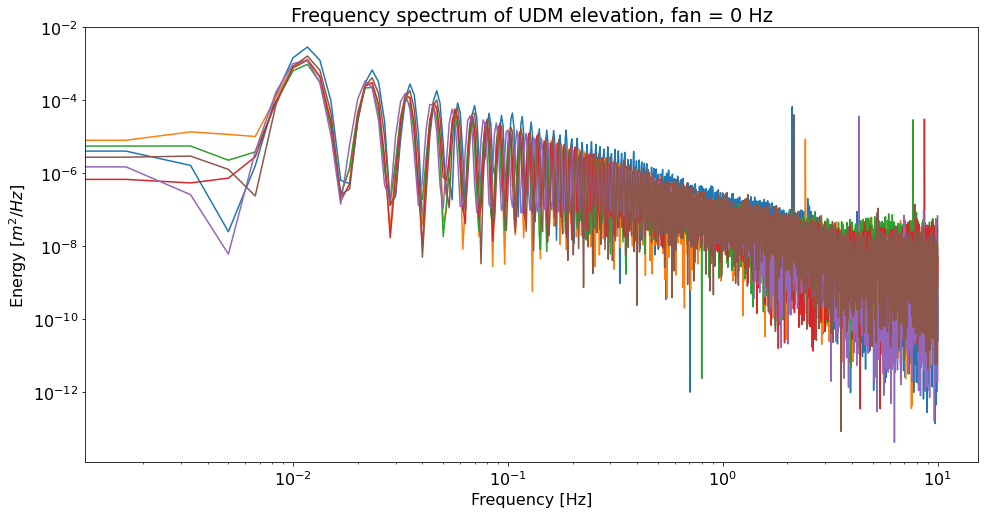

In [12]:
plt.figure(figsize=(16,8))
plt.loglog(f, F1)
plt.loglog(f, F2)
plt.loglog(f, F3)
plt.loglog(f, F4)
plt.loglog(f, F5)
plt.loglog(f, F6)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy [$m^2/Hz$]')
plt.title('Frequency spectrum of UDM elevation, fan = 0 Hz')

## Bin-average to clean up the long end of the spectrum

In [13]:
F1_sawtooth, f_sawtooth, df = power_spectrum(detrend(e1[mask]), 1 / 20, binsize=32)
F2_sawtooth, f_sawtooth, df = power_spectrum(detrend(e2[mask]), 1 / 20, binsize=32)
F3_sawtooth, f_sawtooth, df = power_spectrum(detrend(e3[mask]), 1 / 20, binsize=32)
F4_sawtooth, f_sawtooth, df = power_spectrum(detrend(e4[mask]), 1 / 20, binsize=32)
F5_sawtooth, f_sawtooth, df = power_spectrum(detrend(e5[mask]), 1 / 20, binsize=32)
F6_sawtooth, f_sawtooth, df = power_spectrum(detrend(e6[mask]), 1 / 20, binsize=32)

Text(0.5, 1.0, 'Bin-averaged frequency spectrum of UDM elevation, fan = 0 Hz')

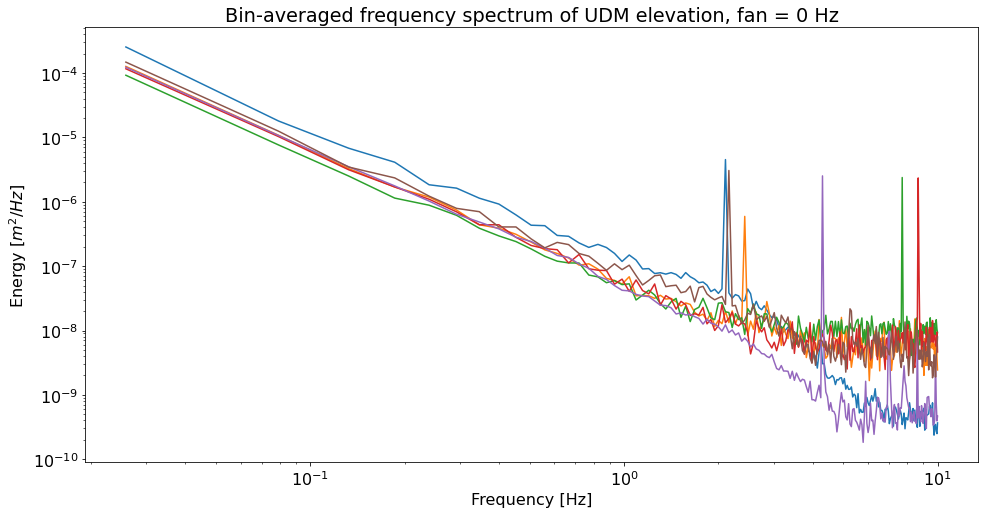

In [14]:
plt.figure(figsize=(16, 8))
plt.loglog(f_sawtooth, F1_sawtooth)
plt.loglog(f_sawtooth, F2_sawtooth)
plt.loglog(f_sawtooth, F3_sawtooth)
plt.loglog(f_sawtooth, F4_sawtooth)
plt.loglog(f_sawtooth, F5_sawtooth)
plt.loglog(f_sawtooth, F6_sawtooth)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy [$m^2/Hz$]')
plt.title('Bin-averaged frequency spectrum of UDM elevation, fan = 0 Hz')

## Remove the spurious spectrum from the wavy data

In [15]:
DATAPATH = '/home/milan/Work/sustain/data/sustain-drag-2020/20191121'
files = glob.glob(DATAPATH + '/TOA5_SUSTAIN_ELEVx6_20Hz*.dat')
start_time = datetime(2019, 11, 21, 16, 10)
fan = range(0, 65, 5)
run_seconds = 600

In [16]:
# read UDM data from TOA5 files
newtime, u1, u2, u3, u4, u5, u6 = read_udm_from_toa5(files)

Reading  TOA5_SUSTAIN_ELEVx6_20Hz.ELEV_1276_2019_11_21_1700.dat
Reading  TOA5_SUSTAIN_ELEVx6_20Hz.ELEV_1277_2019_11_21_1800.dat
Reading  TOA5_SUSTAIN_ELEVx6_20Hz.ELEV_1275_2019_11_21_1600.dat


In [17]:
def elevation_from_udm(x):
    """Remove spikes and offset."""
    xx = x[:]
    for n in range(5):
        for i in range(1, xx.size-1):
            if xx[i] > 1.6:
                xx[i] = 0.5 * (xx[i-1] + xx[i+1])
    offset = np.mean(xx[:1200])
    xx = offset - xx
    return xx

In [18]:
# map UDM arrays to sequential positions in the tank
udm = np.zeros((5, u1.size))
udm[0,:] = u6[:]
udm[1,:] = u5[:]
udm[2,:] = u1[:]
udm[3,:] = u3[:]
udm[4,:] = u4[:]

# map sawtooth spectrum to sequential positions in the tank
F_sawtooth = np.zeros((5, f_sawtooth.size))
F_sawtooth[0,:] = F6_sawtooth[:]
F_sawtooth[1,:] = F5_sawtooth[:]
F_sawtooth[2,:] = F1_sawtooth[:]
F_sawtooth[3,:] = F3_sawtooth[:]
F_sawtooth[4,:] = F4_sawtooth[:]

fetch = np.array([3, 6, 9, 12, 15]) # TODO get exact values

In [19]:
t0 = [start_time + timedelta(seconds=n * run_seconds)
    for n in range(len(fan))]
t1 = [start_time + timedelta(seconds=(n + 1) * run_seconds)
    for n in range(len(fan))]

Computing wave spectra for fan speed  5 Hz
Computing wave spectra for fan speed  10 Hz
Computing wave spectra for fan speed  15 Hz
Computing wave spectra for fan speed  20 Hz
Computing wave spectra for fan speed  25 Hz
Computing wave spectra for fan speed  30 Hz
Computing wave spectra for fan speed  35 Hz
Computing wave spectra for fan speed  40 Hz
Computing wave spectra for fan speed  45 Hz
Computing wave spectra for fan speed  50 Hz
Computing wave spectra for fan speed  55 Hz
Computing wave spectra for fan speed  60 Hz


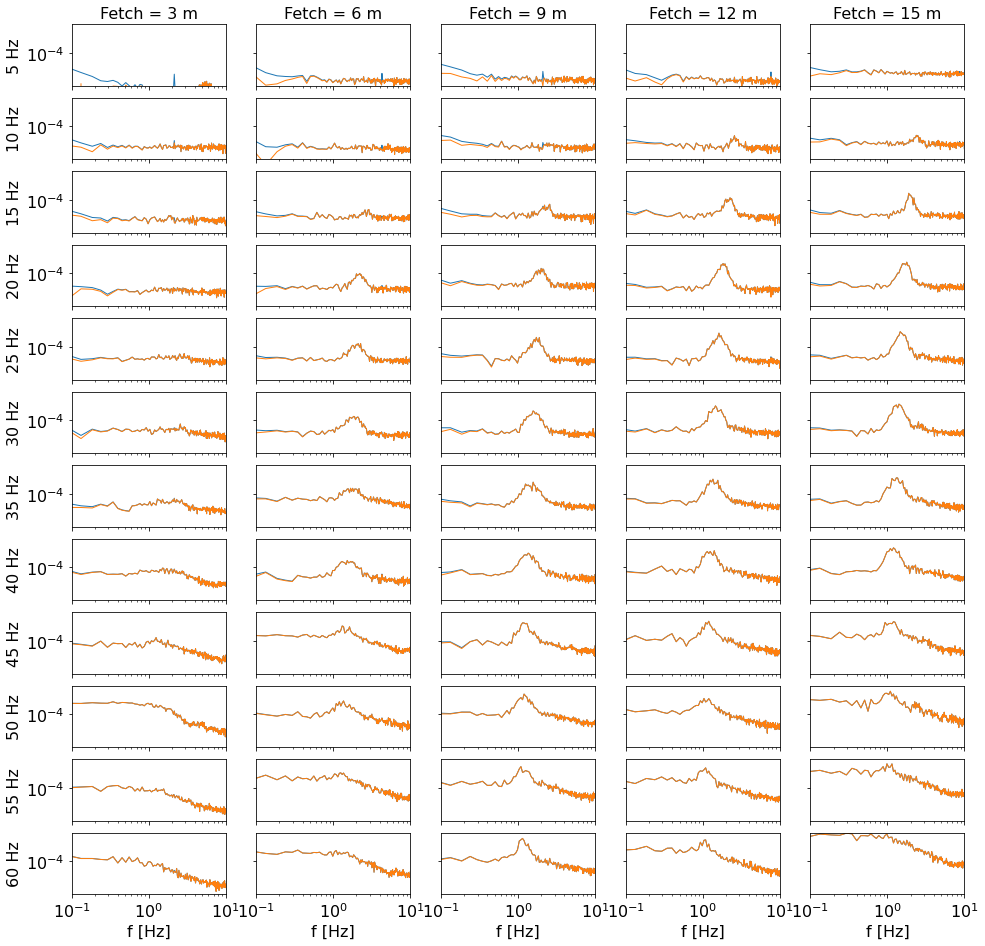

In [20]:
fig = plt.figure(figsize=(16, 16))
for n in range(1, len(fan)):
    print('Computing wave spectra for fan speed ', fan[n], 'Hz')
    mask = (newtime >= t0[n]) & (newtime <= t1[n])
    for i in range(5):
        ax = plt.subplot2grid((12, 5), (n - 1, i))
        e = detrend(elevation_from_udm(udm[i,mask]))
        F, f, df = power_spectrum(e, 1 / 20, binsize=32)
        ax.loglog(f, F, lw=1)
        ax.loglog(f, F - F_sawtooth[i,:], lw=1)
        plt.xlim(1e-1, 1e1)
        plt.ylim(5e-7, 1e-2)
        if n == 1: plt.title('Fetch = ' + str(fetch[i]) + ' m', fontsize=16)
        if n == 12: plt.xlabel('f [Hz]', fontsize=16)
        if n != 12: ax.set_xticklabels([])
        if i == 0: plt.ylabel(str(fan[n]) + ' Hz', fontsize=16)
        if i != 0: ax.set_yticklabels([])

## What's the error of calculating mean elevation?

Considering the spurious sawtooth signal in the UDM data, and the averaging window of 10 minutes, how large is the error in mean elevation if we average it over any single 10-minute time window?

In [21]:
start_time = datetime(2019, 11, 14, 19, 0)
mask = time <= start_time + timedelta(minutes=20)

sampling_frequency = 20
averaging_window = 600 * sampling_frequency

emean1 = []
emean2 = []
emean3 = []
emean4 = []
emean5 = []
emean6 = []

for i in range(0, len(e1[mask])-averaging_window):
    emean1.append(np.mean(e1[mask][i:i+averaging_window]))
    emean2.append(np.mean(e2[mask][i:i+averaging_window]))
    emean3.append(np.mean(e3[mask][i:i+averaging_window]))
    emean4.append(np.mean(e4[mask][i:i+averaging_window]))
    emean5.append(np.mean(e5[mask][i:i+averaging_window]))
    emean6.append(np.mean(e6[mask][i:i+averaging_window]))

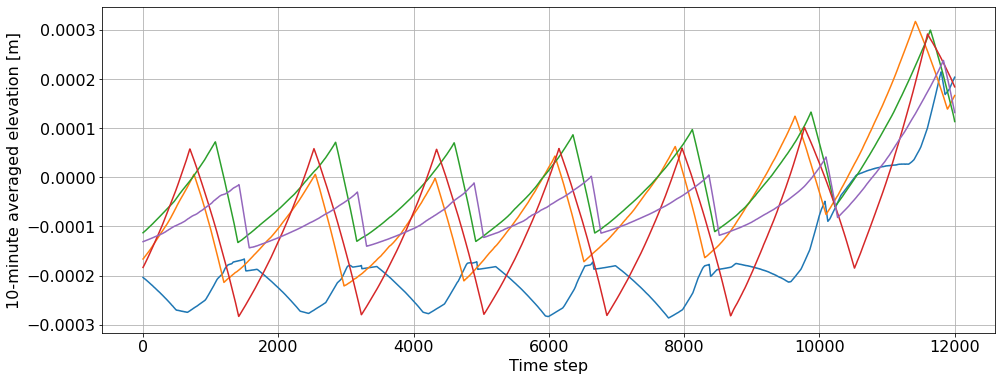

In [22]:
plt.figure(figsize=(16, 6))
plt.plot(emean1)
plt.plot(emean3)
plt.plot(emean4)
plt.plot(emean5)
plt.plot(emean6)
plt.xlabel('Time step')
plt.ylabel('10-minute averaged elevation [m]')
plt.grid()

## Takeaways

* Spurious sawtooth signal of ~90-s dominant period present in UDM raw time series.
* Because sawtooth is not well represented by sines, it pollutes the spectrum if Fourier transform applied to the time seres.
* We can compute the spurious spectrum by analyzing time series of calm water surface, then later remove it from the spectrum of wavy water surface.
* However, if the spurious sawtooth spectrum has almost no impact on wavy spectrum, especially in high winds, due to its magnitude being smaller by few orders.
* Regarding the calculation of mean elevation, if we average over long-enough time period like 10 minutes, the error in mean elevation due to the sawtooth signal is always less than 0.4 mm.